In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd

In [3]:
Temp_df = pd.read_csv("GlobalLandTemperaturesByState.csv",delimiter = ',')
display(Temp_df)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [8]:
Temp_df['dt'] = pd.to_datetime(Temp_df.loc[:,'dt'])
data = Temp_df.loc[Temp_df['dt'].dt.year >= 2000]
data = data.query('State == "Wyoming" or State == "Nebraska" or State == "South Dakota"')
data = data[["dt","AverageTemperature","State"]]
display(data)

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


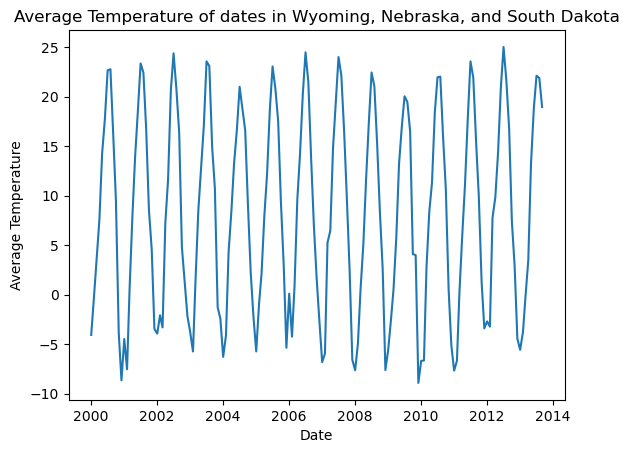

In [76]:
grouped = data.groupby('dt',as_index = False)
data = grouped['AverageTemperature'].mean()

plt.figure()
plt.plot(data['dt'],data['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature of dates in Wyoming, Nebraska, and South Dakota')
plt.show()

In [35]:
def time_in_hours(year, month, day):
    dec_date = year + (month/12) + (day/30) #This is a decent approximation for the decimal day, of course there is not 30 days in each month, but the difference is small enough...
    return dec_date

year = data['dt'].dt.year
month = data['dt'].dt.month
day = data['dt'].dt.day

t = time_in_hours(year,month,day)

In [72]:
def fitting(t,a,b,h,k):
    return a*np.sin(b*(t-h))+k

p0 = [50,6.5,10,15]

parameters, covariance = opt.curve_fit(fitting,x,data['AverageTemperature'],p0)

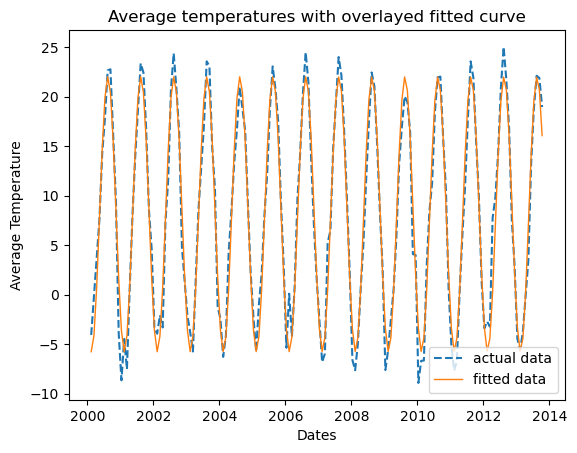

In [81]:
plt.figure()
plt.plot(x,data['AverageTemperature'],linestyle = 'dashed',label = "actual data")
plt.plot(x,fitting(x,parameters[0],parameters[1],parameters[2],parameters[3]),linewidth = 1, label = 'fitted data')
plt.xlabel("Dates")
plt.ylabel("Average Temperature")
plt.title("Average temperatures with overlayed fitted curve")
plt.legend()
plt.show()

In [91]:
error_a = np.sqrt(covariance[0,0])
error_b = np.sqrt(covariance[1,1])
error_h = np.sqrt(covariance[2,2])
error_k = np.sqrt(covariance[3,3])

print('a={0:1.5f} +/- {1:1.5f}'.format(parameters[0],error_a))
print('b={0:1.5f} +/- {1:1.5f}'.format(parameters[1],error_b))
print('h={0:1.5f} +/- {1:1.5f}'.format(parameters[2],error_h))
print('k={0:1.5f} +/- {1:1.5f}'.format(parameters[3],error_k))

print() #Empty line

print('f={0:1.5f}*sin({1:1.5f}(t-{2:1.5f})+{3:1.5f}'.format(parameters[0],parameters[1],parameters[2],parameters[3]))

a=13.89960 +/- 0.22639
b=6.27937 +/- 0.00416
h=-54.87509 +/- 1.36547
k=8.12295 +/- 0.16051

f=13.89960*sin(6.27937(t--54.87509)+8.12295
